In [1]:
#importing libraries
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic-passengers.csv', sep= ';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


### Data preprocessing

In [3]:
#Filling the missing values with mean or mode
data['Cabin'].fillna('G6', inplace = True) 
data['Age'].fillna(data['Age'].mean(), inplace = True) 
data['Embarked'].fillna('S', inplace = True

#Drop unwanted features
data.drop(['PassengerId','Ticket','Name'], axis= 1, inplace= True)

#convert Survived variable and sex into numerical
data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0}) 
data["Sex"]=data["Sex"].map({"male": 1, "female": 0})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,1,28.0,0,0,13.0000,G6,S
1,0,3,1,25.0,0,0,7.6500,F G73,S
2,0,3,1,20.0,0,0,7.8542,G6,S
3,0,3,0,29.0,0,4,21.0750,G6,S
4,0,1,1,31.0,1,0,52.0000,B71,S


# Data visualization

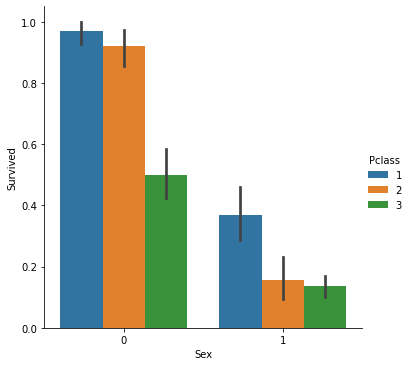

In [4]:
#Visualazing the distributin of the survivers based on their sex and the class in which they traveled.
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=data)

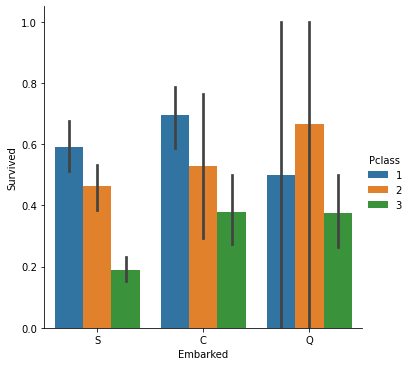

In [5]:
#Visualazing the distributin of the survivers based on where they embarked and the class in which they traveled.
sns.catplot(x="Embarked", y="Survived", hue="Pclass", kind="bar", data=data)

# Feature selection

In [7]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = data[['Pclass','Sex']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


# Building our confusion matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

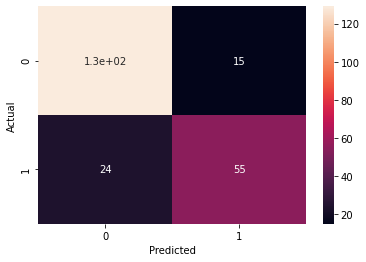

In [8]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [35]:
#Variable declaration

TP,TN,FP,FN = 55, 15, 24, 1.3# we 1.3  as an approximative value. The real value is 1.3e+02

#Calculate Accuracy

A=(TP+TN)/(TP+TN+FP+FN)

print("Accuracy=", A , "is sensitivly equal to our predicted result😊.")

Accuracy= 0.7345225603357818 is sensitivly equal to our predicted result😊.


### ROC stands for Receiver Operating Characteristic curve. It's a graph that shows the performance of a classification model at all classification thresholds by plotting True Positive Rate(TPR) vs. False Positive Rate(FPR) at different classification thresholds.
### AUC stands for Area Under the ROC Curve.It measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1), like in integral calculus.

In [10]:
#TPR and FPR calculation
TPR= TP/(TP+FN)
FPR= FP/(FP+TN)
print('TPR=',TPR )
print('FPR=',FPR)

TPR= 0.9769094138543517
FPR= 0.6153846153846154


## Applying ROC / AUC in our case

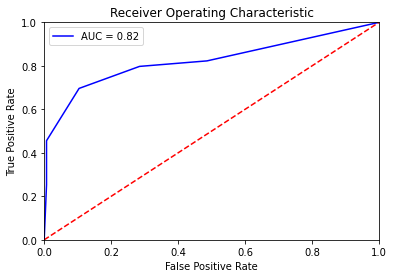

In [34]:
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification.
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds) 
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) # we are plotting TPR vs FPR with the blue line.

plt.legend() #To display the AUC value in the graph.

plt.plot([0, 1], [0, 1],'r--') #The red dotted line shows where TPR =FPR.

#Our graph should be in values between (0,0),(1,1).
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show() # To display a graph that will show TPR vs FPR at all thresholds.
